### Imports

In [21]:
# standard imports
import pandas as pd
import numpy as np

# models
import wrangle

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  Acquire and Prep

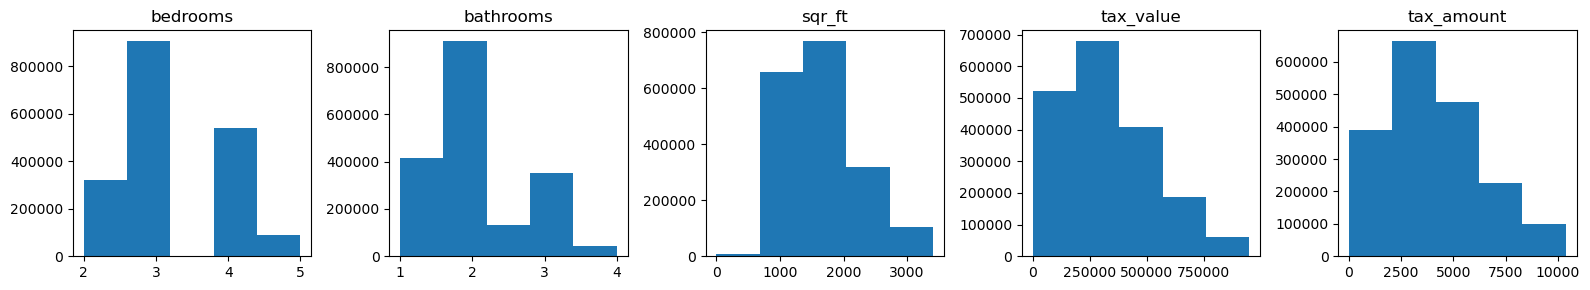

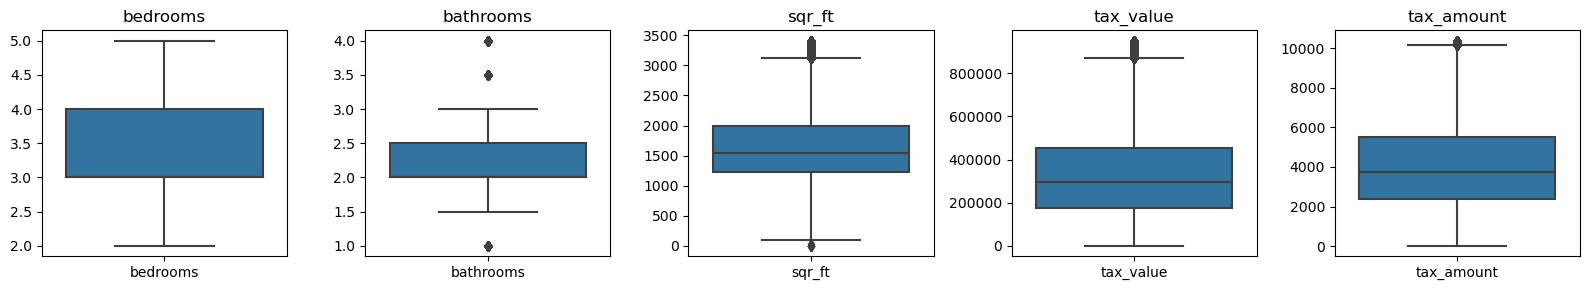

In [2]:
train, validate, test = wrangle.wrangle_zillow()

In [3]:
# inital glace at data
print('_'*50)
print(f'Data Frame: \n{train.sort_index().head(2).T.to_markdown()}')
print('_'*50)
print(f'Stats: \n{train.describe().T}')
print('_'*50)
print('Info: ')
print(train.info())
print('_'*50)
print(f'Data Types: \n{train.dtypes}')
print('_'*50)
print(f'Null Values: \n{train.isnull().sum()}')
print('_'*50)
print(f'NA Values: \n{train.isna().sum()}')
print('_'*50)
print(f'Unique Value Count: \n{train.nunique()}')

__________________________________________________
Data Frame: 
|            |        6 |        18 |
|:-----------|---------:|----------:|
| bedrooms   |      3   |      3    |
| bathrooms  |      4   |      1    |
| sqr_ft     |   1620   |   1244    |
| tax_value  | 847770   | 169471    |
| year_built |   2011   |   1950    |
| tax_amount |  10244.9 |   2532.88 |
| fips       |   6037   |   6037    |
| zipcode    |  96047   |  96201    |
__________________________________________________
Stats: 
                count           mean            std      min        25%  \
bedrooms    1038959.0       3.214004       0.781049     2.00       3.00   
bathrooms   1038959.0       2.053663       0.707839     1.00       2.00   
sqr_ft      1038959.0    1653.719097     564.247247     1.00    1232.00   
tax_value   1038959.0  327962.928757  198987.574520    22.00  173843.50   
year_built  1038959.0    1959.442489      20.533503  1812.00    1949.00   
tax_amount  1038959.0    4069.177134    2242.51

In [5]:
# amount of null zipcode values in dataset
# num_of_null = (len(train[train["regionidzip"].isnull() == True]))
# amount of values in dataset
# total_rows = len(train.regionidzip)
# percent of zipcode values that are null values
# (num_of_null/total_rows)*100

Less than 1% of the zipcode data are null values. Because I need to report the location of property tax values, I will drop these values and return to them if time alots. Worth noting the original dataset did have other location identifiers such as latittude and longitude that could be used to dissect the location of properties with null zipcode values.

### Exploration

In [5]:
train.head()

,bedrooms,bathrooms,sqr_ft,tax_value,year_built,tax_amount,fips,zipcode
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0,96995.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0,96124.0
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0,96265.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0,96040.0
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0,96282.0


bedrooms x tax_value
bathrooms x tax_value
sqr_ft x tax_value
zipcode x tax_value

In [11]:
corr = train.corr()

In [12]:
corr

,bedrooms,bathrooms,sqr_ft,tax_value,year_built,tax_amount
bedrooms,1.000000,0.580249,0.593592,0.200161,0.364570,0.199798
bathrooms,0.580249,1.000000,0.762476,0.354842,0.532318,0.354405
sqr_ft,0.593592,0.762476,1.000000,0.423012,0.464196,0.417093
tax_value,0.200161,0.354842,0.423012,1.000000,0.249055,0.969866
year_built,0.364570,0.532318,0.464196,0.249055,1.000000,0.252396
tax_amount,0.199798,0.354405,0.417093,0.969866,0.252396,1.000000


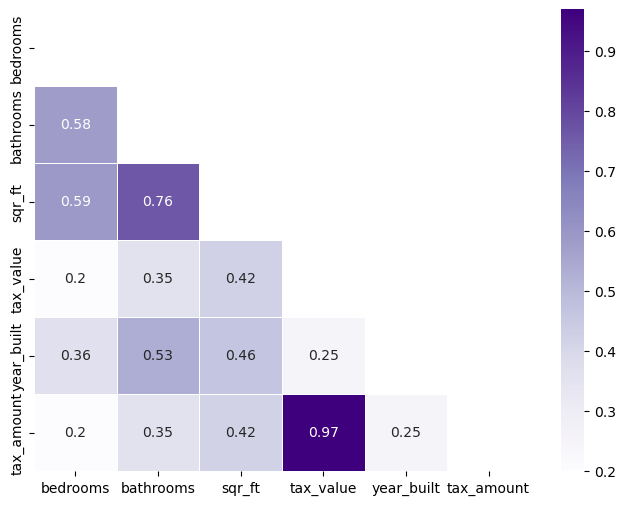

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='Purples', annot=True, linewidths=0.5, mask=np.triu(corr))
plt.ylim
plt.show()

It looks like there is a strong correlation between sqr_ft and bathrooms.

Another semi-strong correlation is:
- bedrooms and sqr_ft
- bedrooms and bathrooms

bathrooms and year_built is the last correlation with a correlation score greater than .5

In [16]:
from scipy.stats import pearsonr, spearmanr
r, p_value = pearsonr(train.bathrooms, train.sqr_ft)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.7624756634660298
P-value: 0.0


<Figure size 1500x1500 with 0 Axes>

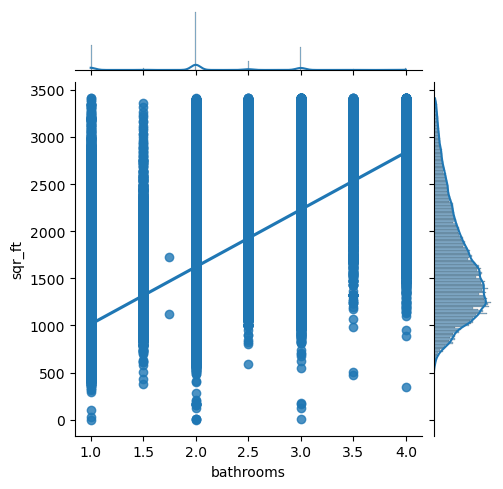

In [24]:
plt.figure(figsize=(15,15))
sns.jointplot(x="bathrooms", y="sqr_ft", data=train,  kind='reg', height=5)
plt.show()

<Figure size 1500x1500 with 0 Axes>

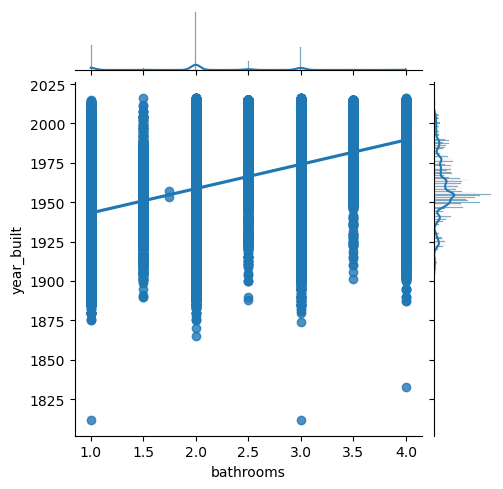

In [25]:
plt.figure(figsize=(15,15))
sns.jointplot(x="bathrooms", y="year_built", data=train,  kind='reg', height=5)
plt.show()

<Figure size 1500x1500 with 0 Axes>

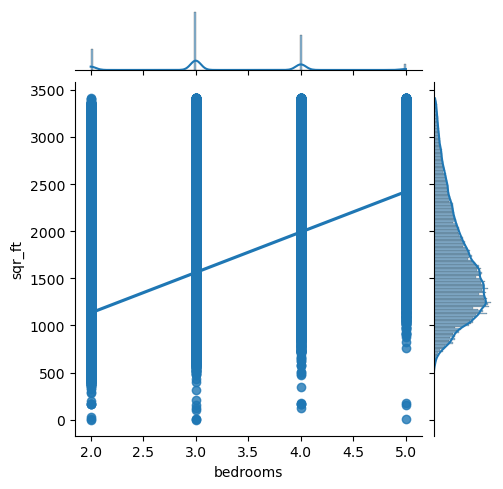

In [26]:
plt.figure(figsize=(15,15))
sns.jointplot(x="bedrooms", y="sqr_ft", data=train,  kind='reg', height=5)
plt.show()

<Figure size 1500x1500 with 0 Axes>

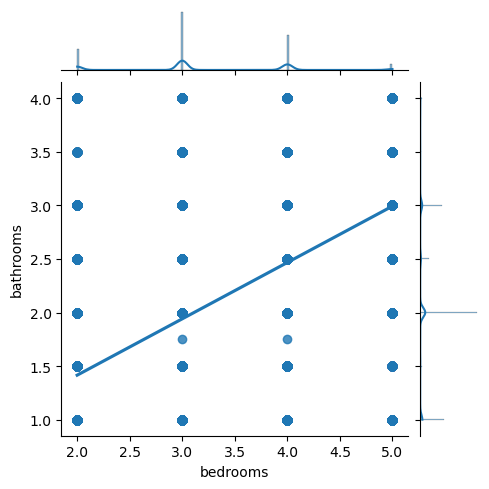

In [27]:
plt.figure(figsize=(15,15))
sns.jointplot(x="bedrooms", y="bathrooms", data=train,  kind='reg', height=5)
plt.show()